In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)
print('hello')

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
hello


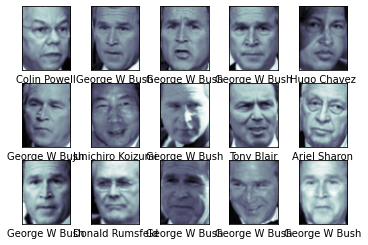

In [7]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [12]:
X = faces.data
X.shape

(1348, 2914)

In [13]:
y = faces.target
y.shape

(1348,)

### Implement Simple PCA with Isomap

In [8]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(faces.data)
data_projected = iso.transform(faces.data)
data_projected.shape

(1348, 2)

### Visualize Clusters

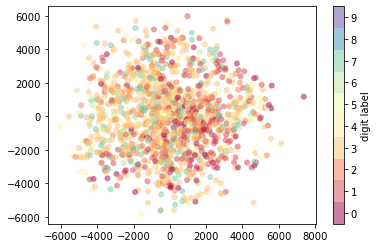

In [10]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=faces.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

### Gaussian Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.4599406528189911

### Random Forests

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [18]:
accuracy_score(ytest, y_model)

0.6379821958456974

### Support Vector Machine

In [19]:
from sklearn.svm import SVC
model = SVC()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.7299703264094956